# Part 1

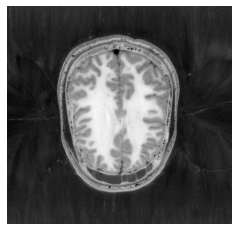

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

color_mri = cv2.imread('./Color_MRI.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(color_mri, cmap='gray')
plt.axis('off')
plt.show()

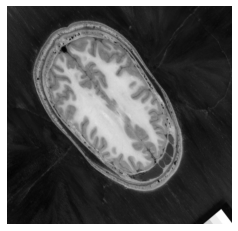

In [59]:
color_mri2 = cv2.imread('./Color_MRI2.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(color_mri2, cmap='gray')
plt.axis('off')
plt.show()

# Part 2

### At first I save images together

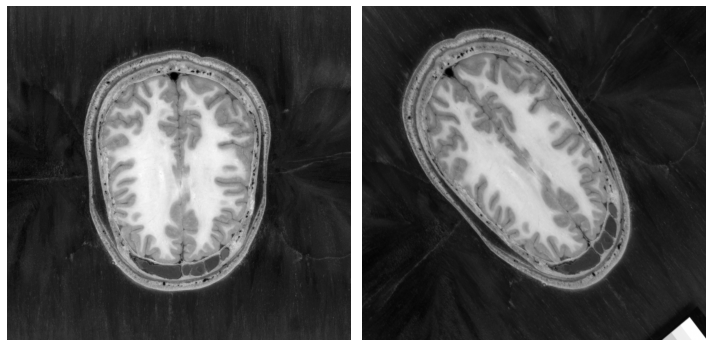

In [60]:
plt.subplots(1, 2,figsize = (10,7))
plt.subplot(1,2,1)
plt.imshow(color_mri,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(color_mri2,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('both.png',bbox_inches= 'tight',pad_inches = 0)
plt.show()

### Read both image

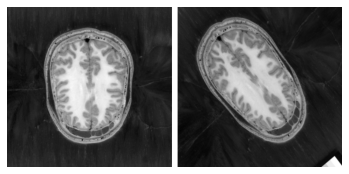

In [116]:
image = plt.imread('./both.png')
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

### Click on same points in both images in order
### and left click when you're done

(333, 698, 4)


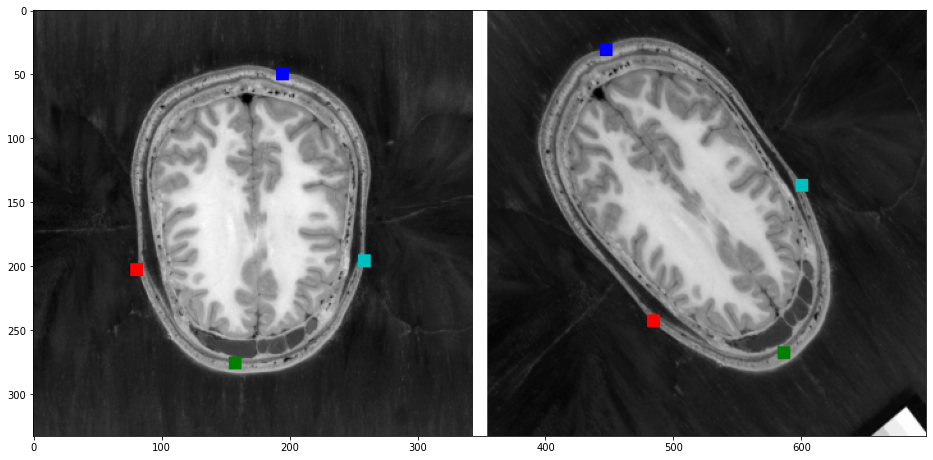

In [117]:
import matplotlib.colors as mcolors

colors = list(mcolors.BASE_COLORS.keys())
j = 0

pic1_points = []
pic2_points = []


def Test_Affiche(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.destroyAllWindows()

    if event == cv2.EVENT_LBUTTONDOWN:
        seeds.append([y, x])


print(image.shape)
seeds = []
cv2.namedWindow('image')
cv2.setMouseCallback('image', Test_Affiche)
cv2.imshow('image', image)
cv2.waitKey(0)

for i in seeds:

    image[i[0]-5:i[0]+5, i[1]-5:i[1] +
          5] = mcolors.to_rgba(colors[j], alpha=None)
    if i[1] > image.shape[1]/2:
        pic2_points.append(
            [int((i[1]-image.shape[1]/2)*831*2/image.shape[1]), int(i[0]*806/image.shape[0])])
        j += 1
    else:
        pic1_points.append(
            [int(i[1]*831*2/image.shape[1]), int(i[0]*806/image.shape[0])])

plt.figure(figsize=(16, 8))
plt.imshow(image)
plt.show()


In [118]:
print(pic1_points)
print(pic2_points)

[[464, 121], [376, 668], [192, 491], [616, 474]]
[[235, 75], [566, 648], [323, 588], [600, 331]]


# Part 3

In [119]:
M = np.array([[x, y, 1] for x,y in pic2_points])
X = np.array([[x] for x, y in pic1_points])
Y = np.array([[y] for x, y in pic1_points])

MT = M.T
MTM = MT @ M
MTX = MT @ X
MTY = MT @ Y

alpha1 = np.linalg.solve(MTM, MTX)
alpha2 = np.linalg.solve(MTM, MTY)

[[  0.90186254  -0.67738737 301.3647579 ]
 [  0.53356818   0.64183677 -54.94187853]]


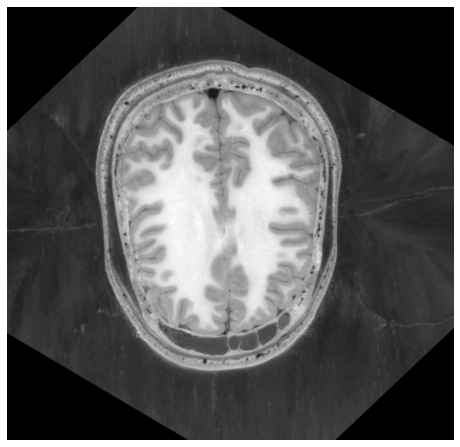

In [120]:
transform = np.array([alpha1.reshape(-1), alpha2.reshape(-1)])
print(transform)
transformed = cv2.warpAffine(color_mri2, transform, (831, 806))
plt.figure(figsize=(8, 8))
plt.imshow(transformed, cmap='gray')
plt.axis('off')
plt.show()

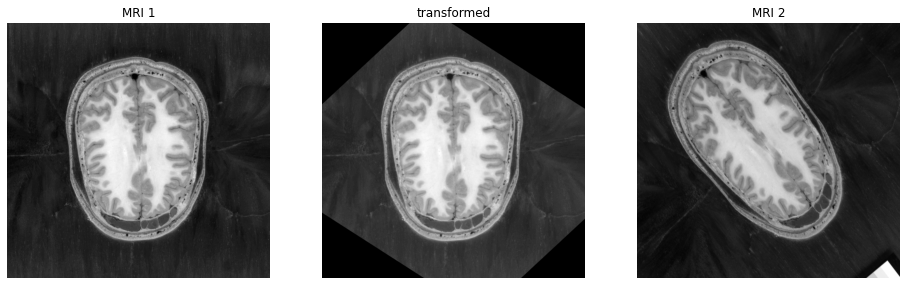

In [114]:
plt.subplots(1, 3,figsize = (16,8))

plt.subplot(1, 3, 1)
plt.imshow(color_mri, cmap='gray')
plt.title('MRI 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed, cmap='gray')
plt.title('transformed')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(color_mri2, cmap='gray')
plt.title('MRI 2')
plt.axis('off')

plt.show()

# Part 4

In [107]:
def get_2d_histogram(img1, img2, bins=20):
    histo = np.zeros((bins, bins))
    width = 255 // bins + 1
    
    for i in range(img1.shape[0]):
        for j in range(img2.shape[1]):
            bin1 = img1[i, j] // width
            bin2 = img2[i, j] // width
            histo[bin1, bin2] += 1
            
    return histo

def show_2d_histogram(img1, img2):
    plt.figure(figsize=(8,8))
    histo = get_2d_histogram(img1, img2)
    plt.axis('off')
    plt.imshow(histo)

# Part 5

### First 2 images histogram

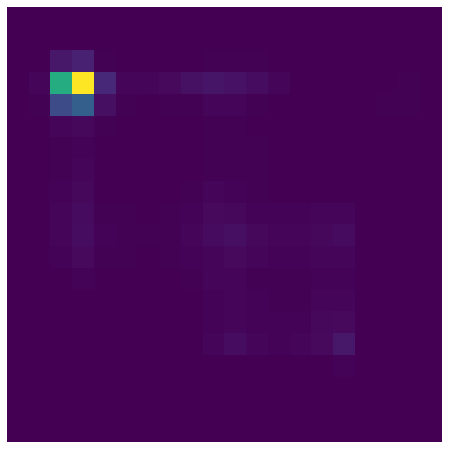

In [99]:
show_2d_histogram(color_mri, color_mri2)

### Histogram of Original image and transformed image

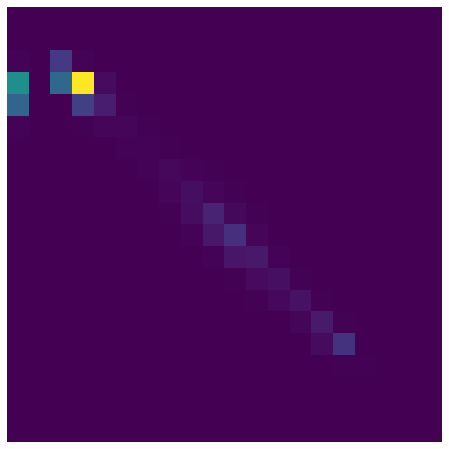

In [115]:
show_2d_histogram(color_mri, transformed)

### Histogram of original image with itself

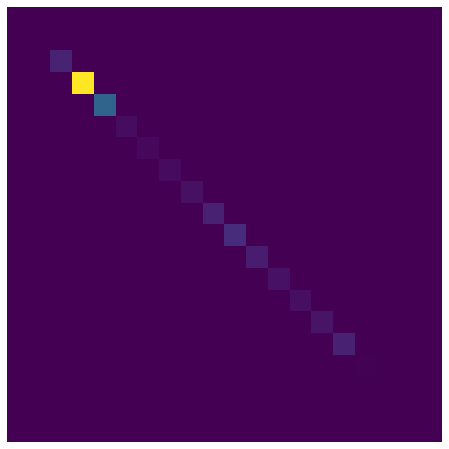

In [80]:
show_2d_histogram(color_mri, color_mri)

### As we can see, histogram of transformed image and original image is similar to histogram of original image with itself.
### These two histograms are diagonal because intensity of same pixels from them are equal.
### It is clear that, there is no similarity between original image and second image based on their histograms.